# Data Preprocessing - Part 1

Author: Harry Zhou

Contact: haininzhou@gmail.com

Date: 2023-06-20

## Introduction:

Diabetes is a chronic metabolic disorder that affects a significant portion of the global population. Early detection and accurate prediction of diabetes are crucial for timely intervention and the implementation of preventive measures. In recent years, the integration of regression and machine learning techniques has emerged as a promising approach to predict diabetes and identify patterns related to the disease. In this study, we aim to explore the use of regression and machine learning algorithms to predict diabetes and investigate various factors associated with its occurrence.

In this study, we will train and evaluate both regression models (e.g., logistic regression) and machine learning algorithms (e.g., decision trees, random forests, or support vector machines) using the provided dataset. We will assess the performance of each approach by measuring their accuracy in predicting diabetes based on the given features.

### Dataset

The dataset used for this analysis is derived from the publicly available 2021 Behavioral Risk Factor Surveillance System (BRFSS) data provided by the CDC. The original dataset comprises 303 variables and includes information on 438,693 subjects. The data source at the following link: https://www.cdc.gov/brfss/annual_data/annual_2021.html. However, for the purpose of investigating factors influencing diabetes and other chronic health conditions, only a subset of relevant features has been selected for inclusion in this analysis.

##### Field of interest:
- Diabetes: if he/she has diabetes or not? (0 is negative, 1 is positive)

### Question of interest


> How can we use regression and machine learning techniques to predict whether an individual has diabetes based on their age, BMI, smoking history, heart disease, hypertension, and blood glucose levels? 


## Content

[ 1 - Data Loading ](#1.-Data-Loading)

[ 2 - Data Clean](#2.-Data-Cleaning)

[ 3 - Make Feature Names More Readable](#3.-Make-feature-names-more-readable)

[ 4 - Save Clean Data to CSV](#4.-Save-clean-data-to-csv)

Since the original dataset is in XPT format, for improved data loading and cleaning performance, R version 2.8.1 and Python version 3.10.12 will utilize to process the data

## 1. Data Loading 

In [1]:
# Import Numpy ,Pandas ,Pyplot , scipy and Seaborn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read the SAS file into a new DataFrame
df = pd.read_sas('LLCP2021.xpt')

# Create a copy of the DataFrame to avoid fragmentation
raw_df = df.copy()

# Join all columns at once using pd.concat(axis=1)
raw_df = pd.concat([raw_df], axis=1)

In [4]:
raw_df.sample(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
391511,51.0,4.0,b'06182021',b'06',b'18',b'2021',1100.0,b'2021000801',2.021001e+09,1.0,...,1.000000e+00,5.397605e-79,1.000000e+02,NaN,1.0,9.0,1.0,1.0,5.397605e-79,1.000000e+00
198593,29.0,8.0,b'08312021',b'08',b'31',b'2021',1100.0,b'2021001922',2.021002e+09,1.0,...,1.000000e+00,1.000000e+00,1.570000e+02,216.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
86844,18.0,12.0,b'01072022',b'01',b'07',b'2022',1200.0,b'2021002437',2.021002e+09,1.0,...,5.397605e-79,5.397605e-79,NaN,NaN,9.0,9.0,1.0,1.0,1.000000e+00,1.000000e+00
214564,30.0,11.0,b'12032021',b'12',b'03',b'2021',1100.0,b'2021005260',2.021005e+09,NaN,...,1.000000e+00,1.000000e+00,5.397605e-79,70.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
115345,20.0,1.0,b'02022021',b'02',b'02',b'2021',1100.0,b'2021011117',2.021011e+09,NaN,...,1.000000e+00,1.000000e+00,8.400000e+01,150.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
434109,72.0,1.0,b'06152021',b'06',b'15',b'2021',1100.0,b'2021000813',2.021001e+09,NaN,...,1.000000e+00,1.000000e+00,1.000000e+02,73.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
392048,51.0,8.0,b'09032021',b'09',b'03',b'2021',1100.0,b'2021001338',2.021001e+09,1.0,...,1.000000e+00,1.000000e+00,1.700000e+01,71.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
391847,51.0,5.0,b'05152021',b'05',b'15',b'2021',1100.0,b'2021001137',2.021001e+09,1.0,...,5.397605e-79,1.000000e+00,NaN,228.0,9.0,1.0,1.0,1.0,1.000000e+00,5.397605e-79
73776,15.0,11.0,b'12042021',b'12',b'04',b'2021',1100.0,b'2021007096',2.021007e+09,NaN,...,1.000000e+00,1.000000e+00,4.300000e+01,100.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
3618,1.0,10.0,b'11112021',b'11',b'11',b'2021',1100.0,b'2021003619',2.021004e+09,NaN,...,1.000000e+00,1.000000e+00,2.000000e+02,160.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [17]:
# This quick check seems to show that the data is loaded correctly now.
raw_df.shape

(438693, 303)

At this point we have 438,693 records and 303 columns. Each record contains an individual's BRFSS 2021 survey responses

### Selected Subset of Features from latest BRFSS 2021

To address these risk factors, I have carefully selected features (columns/questions) in the BRFSS dataset that are relevant to these risk factors. In order to better understand the meaning of these columns, I have consulted the BRFSS 2021 Codebook, which provides detailed information about the questions and their corresponding variables. By comparing the variable names in the codebook with the variable names in the CDC dataset that I downloaded, I have ensured accurate matching.

Furthermore, to enhance the selection process, I have incorporated expert knowledge and referenced a research paper titled *Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques* by Zidian Xie et al., which utilized the 2014 BRFSS dataset. This allowed me to include some of the same features that were identified in their research paper, thus adding credibility to my feature selection process.

**BRFSS 2021 Codebook:** https://www.cdc.gov/brfss/annual_data/2021/pdf/codebook21_llcp-v2-508.pdf

**Relevant Research Paper using BRFSS for Diabetes ML:** https://www.cdc.gov/pcd/issues/2019/19_0109.htm


The **selected features** from the BRFSS 2021 dataset are:

| Variable_Category                | Variable  | Description                                                                                                                                                                      | Values                                                                                                                                                                                                                                                                                             |
|:---------------------------------|:----------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Target                           | DIABETE4  | Have you ever been told you have diabetes?                                                                                                                                       | 1: Yes, 2: Yes but pregnant, 3: No, 4: Prediabetes                                                                                                                                                                                                                                                 |
| Demographics                     | AGEG5YR   | Fourteen-level age category                                                                                                                                                      | 1:Age 18 to 24,2:Age 25 to 29,3:Age 30 to 34 ,4:Age 35 to 39 ,5:Age 40 to 44 ,6:Age 45 to 49 ,7:Age 50 to 54 ,8:Age 55 to 59 ,9:Age 60 to 64 ,10:Age 65 to 69 ,11:Age 70 to 74 ,12:Age 75 to 79 ,13:Age 80 or older ,14:Don’t know/Refused/Missing                                                 |
|                                  | SEXVAR    | Indicate sex of respondent                                                                                                                                                       | 1: Male, 2: Female                                                                                                                                                                                                                                                                                 |
|                                  | EDUCA     | What is the highest grade or year of school you completed?                                                                                                                       | "1:Never attended school or only kindergarten, 2: Grades 1 through 8 (Elementary), 3: Grades 9 through 11 (Some high school), 4: Grade 12 or GED (High school graduate) ,5:College 1 year to 3 years (Some college or technical school) ,6:College 4 years or more (College graduate) ,9:Refused " |
|                                  | INCOME3   | What is your annual household income from all sources?                                                                                                                           | 1: <$10 K, 2: $10–$15 K, 3: $15–$20 K, 4: $20–$25 K, 5: $25–$35 K, 6: $35–$50 K, 7: $50–$75 K, 8: $75-100K,9:$100K-$150K,10:$150-$200K,11:>$200K, 77:Don’t know/Not sure,99:Refuse                                                                                                                                                                                          |
| High Blood Pressure              | _RFHYPE6  | Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional                                                                         | 1: No, 2: Yes, 9: Don’t know/Not Sure/Refused/Missing                                                                                                                                                                                                                                              |
| High Cholesterol                 | _CHOLCH3  | Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?                                                                     | 1:Had cholesterol checked in past 5 years,2:Did not have cholesterol checked in past 5 years,3：Have never had cholesterol checked 9：Don’t know/Not Sure Or Refused/Missing                                                                                                                         |
|                                  | TOLDHI3   | Have you ever been told by a doctor, nurse or other health professional that your cholesterol is high?                                                                           | 1: Yes, 2:No,7: Don’t know/Not sure,9: Refused                                                                                                                                                                                                                                             |
| BMI                              | _BMI5CAT  | 4 Categories of body mass index                                                                                                                                                  | 1: Underweight, 2: Normal weight, 3: Overweight, 4: Obese                                                                                                                                                                                                                                          |
| Smoking                          | _SMOKER3  | 4 Levels of smoking status                                                                                                                                                       | 1: Current smoker every day, 2: Current smoker some days, 3: Former smoker, 4: Never smoked                                                                                                                                                                                                        |
| Other Chronic Health Conditions  | CVDSTRK3  | (Ever told) you had a stroke                                                                                                                                                     | 1: Yes, 2:No, 3: No, 7: Don’t know/Not sure,9: Refused                                                                                                                                                                                                                                             |
|                                  | _MICHD    | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                            | 1:Reported having MI or CHD ,2:Did not report having MI or CHD                                                                                                                                                                                                                                     |
|                                  | CVDCRHD4  | Have you ever been told you had angina or coronary heart disease?                                                                                                                | 1: Yes, 2: No                                                                                                                                                                                                                                                                                      |
| Physical Activity                | _TOTINDA  | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job                                                                     | 1: Had physical activity or exercise, 2: No physical activity in past 30 days,9:Don’t know/Refused/Missing                                                                                                                                                                                         |
| Diet                             | _FRTLT1A  | Consume Fruit 1 or more times per day                                                                                                                                            | 1:Consumed fruit one or more times per day,2:Consumed fruit < one time per day ,9:Don´t know, refused or missing values                                                                                                                                                                            |
|                                  | _VEGLT1A  | Consume Vegetables 1 or more times per day                                                                                                                                       | 1:Consumed vegetables one or more times per day,2:Consumed vegetables < one time per day ,9:Don´t know, refused or missing values                                                                                                                                                                  |
| Alcohol Consumption              | _RFDRHV7  | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)                                                                | 1:No, 2: Yes ,9: Don’t know/Refused/Missing                                                                                                                                                                                                                                                        |
| Health Care                      | HLTHPLN   | Adults who had some form of health insurance                                                                                                                                     | "1:Have some form of insurance,2:Do not have some form of health insurance ,9:Don´t know, refused or missing insurance response"                                                                                                                                                                   |
|                                  | MEDCOST1  | "Was there a time in the past 12 months when you needed to see a doctor but could not because you could not afford it?"                                                          | 1:Yes, 2:No,7:Don’t know/Not sure,9:Refused                                                                                                                                                                                                                                                        |
| Health General and Mental Health | GENHLTH   | Would you say that in general your health is:                                                                                                                                    | 1: Excellent, 2: Very good, 3: Good, 4: Fair, 5: Poor                                                                                                                                                                                                                                              |
|                                  | MENTHLTH  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? | 1-30:Number of days,88:None ,77:Don’t know/Not sure,99:Refused                                                                                                                                                                                                                                     |
|                                  | PHYSHLTH  | "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"              | 1-30:Number of days,88:None ,77:Don’t know/Not sure,99:Refused                                                                                                                                                                                                                                     |
|                                  | DIFFWALK  | Do you have serious difficulty walking or climbing stairs                                                                                                                        | 1:Yes, 2:No,7:Don’t know/Not sure,9:Refused                                                                                                                                                                                                                                                        |
|                                  | BLIND     | Are you blind or do you have serious difficulty seeing, even when wearing glasses?                                                                                               | 1: Yes, 2: No                                                                                                                                                                                                                                                                                      |


In [7]:
#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)
raw_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,BPHIGH6,BPMEDS,CHOLCHK3,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,HAVARTH5,ARTHEXER,ARTHEDU,LMTJOIN3,ARTHDIS2,JOINPAI2,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW1,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,IMFVPLA2,PNEUVAC4,HIVTST7,HIVTSTD3,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HPVADVC4,HPVADSHT,TETANUS1,SHINGLE2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,PSATEST1,PSATIME1,PCPSARS2,PCSTALK,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES1,SMALSTOL,STOLTEST,STOOLDN1,BLDSTFIT,SDNATES1,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,HOMBPCHK,HOMRGCHK,WHEREBP,SHAREBP,WTCHSALT,DRADVISE,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,USEMRJN3,RSNMRJN2,LASTSMK2,STOPSMK2,FIREARM5,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE1,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_RFHYPE6,_CHOLCH3,_RFCHOL3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_LMTACT3,_LMTWRK3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,20.0,10.0,88.0,3.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,1.0,2.0,2.0,2.0,1.0,8.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,5.0,NaN,72.0,411.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,888.0,NaN,NaN,NaN,1.0,92020.0,1.0,1.0,2.0,NaN,101.0,555.0,204.0,203.0,201.0,101.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,39.766158,2.0,79.532315,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.519019,874.242902,744.745531,2.0,3.0,2.0,1.0,9.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,11.0,2.0,70.0,6.0,59.0,150.0,3266.0,1454.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,5.397605e-79,100.0,5.700000e+01,4.300000e+01,14.0,100.0,5.397605e-79,5.397605e-79,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.3

In [41]:
#Select features from raw_df

raw_df_selected = raw_df[['DIABETE4',
                          '_AGEG5YR',
                          'SEXVAR',
                          'EDUCA',
                          'INCOME3',
                          '_RFHYPE6',
                          '_CHOLCH3',
                          'TOLDHI3',
                          '_BMI5CAT',
                          '_SMOKER3',
                          'CVDSTRK3',
                          '_MICHD',
                          'CVDCRHD4',
                          '_TOTINDA',
                          '_FRTLT1A',
                          '_VEGLT1A',
                          '_RFDRHV7',
                          '_HLTHPLN',
                          'MEDCOST1',
                          'GENHLTH',
                          'MENTHLTH',
                          'PHYSHLTH',
                          'DIFFWALK',
                          'BLIND']]

In [44]:
raw_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  438690 non-null  float64
 1   _AGEG5YR  438693 non-null  float64
 2   SEXVAR    438693 non-null  float64
 3   EDUCA     438688 non-null  float64
 4   INCOME3   429846 non-null  float64
 5   _RFHYPE6  438693 non-null  float64
 6   _CHOLCH3  438693 non-null  float64
 7   TOLDHI3   377857 non-null  float64
 8   _BMI5CAT  391841 non-null  float64
 9   _SMOKER3  438693 non-null  float64
 10  CVDSTRK3  438691 non-null  float64
 11  _MICHD    434058 non-null  float64
 12  CVDCRHD4  438691 non-null  float64
 13  _TOTINDA  438693 non-null  float64
 14  _FRTLT1A  438693 non-null  float64
 15  _VEGLT1A  438693 non-null  float64
 16  _RFDRHV7  438693 non-null  float64
 17  _HLTHPLN  438693 non-null  float64
 18  MEDCOST1  438688 non-null  float64
 19  GENHLTH   438689 non-null  float64
 20  MENT

**Plan for cleaning**
- make sure that the columns have the right data types
- check for missing data and deal with them appropriately
- check for duplicate information (both in term of columns and rows)

## 2. Data Cleaning

In [45]:
# a TRue/False array, marking whether a row appears more than once
raw_df_selected.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
438688    False
438689    False
438690     True
438691    False
438692    False
Length: 438693, dtype: bool

In [46]:
# the sum of the boolean array gives the number of TRue's
raw_df_selected.duplicated().sum()

40442

In [47]:
# the % of duplicates
raw_df_selected.duplicated().sum()/raw_df_selected.shape[0]*100

9.218747506798604

In [48]:
clean_data = raw_df_selected.drop_duplicates()

In [49]:
clean_data.shape

(398251, 24)

#### Identifying and dealing with missing values 

First, we look at the number of missing values in each column:

In [50]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4        3
_AGEG5YR        0
SEXVAR          0
EDUCA           5
INCOME3      7027
_RFHYPE6        0
_CHOLCH3        0
TOLDHI3     59321
_BMI5CAT    43249
_SMOKER3        0
CVDSTRK3        2
_MICHD       4618
CVDCRHD4        2
_TOTINDA        0
_FRTLT1A        0
_VEGLT1A        0
_RFDRHV7        0
_HLTHPLN        0
MEDCOST1        5
GENHLTH         4
MENTHLTH        2
PHYSHLTH        3
DIFFWALK    15868
BLIND       13624
dtype: int64

#### Missing values in `TOLDHI3`

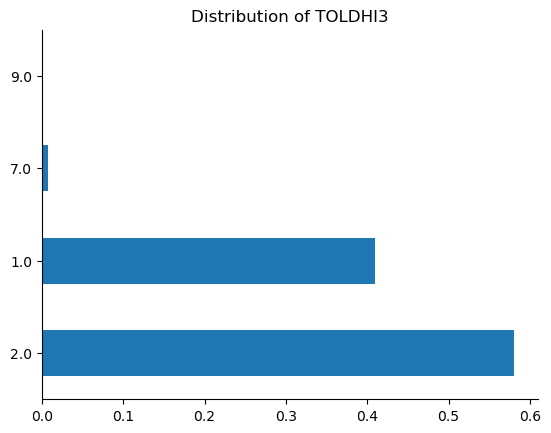

In [51]:
clean_data["TOLDHI3"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of TOLDHI3")
sns.despine()
plt.show()

We can use the 7: unkown category to fill in the missing values(1: Yes, 2:No, 7: Don’t know/Not sure,9: Refused).

In [52]:
clean_data["TOLDHI3"] = clean_data["TOLDHI3"].fillna(7)

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\162344417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["TOLDHI3"] = clean_data["TOLDHI3"].fillna(7)


In [53]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4        3
_AGEG5YR        0
SEXVAR          0
EDUCA           5
INCOME3      7027
_RFHYPE6        0
_CHOLCH3        0
TOLDHI3         0
_BMI5CAT    43249
_SMOKER3        0
CVDSTRK3        2
_MICHD       4618
CVDCRHD4        2
_TOTINDA        0
_FRTLT1A        0
_VEGLT1A        0
_RFDRHV7        0
_HLTHPLN        0
MEDCOST1        5
GENHLTH         4
MENTHLTH        2
PHYSHLTH        3
DIFFWALK    15868
BLIND       13624
dtype: int64

We can use 1 to replace the null values(1: Underweight, 2: Normal weight, 3: Overweight, 4: Obese)

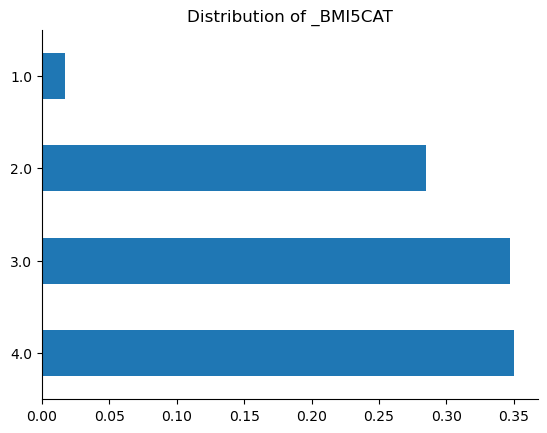

In [54]:
clean_data["_BMI5CAT"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of _BMI5CAT")
sns.despine()
plt.show()

In [55]:
clean_data["_BMI5CAT"] = clean_data["_BMI5CAT"].fillna(1)

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\314790196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["_BMI5CAT"] = clean_data["_BMI5CAT"].fillna(1)


In [56]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4        3
_AGEG5YR        0
SEXVAR          0
EDUCA           5
INCOME3      7027
_RFHYPE6        0
_CHOLCH3        0
TOLDHI3         0
_BMI5CAT        0
_SMOKER3        0
CVDSTRK3        2
_MICHD       4618
CVDCRHD4        2
_TOTINDA        0
_FRTLT1A        0
_VEGLT1A        0
_RFDRHV7        0
_HLTHPLN        0
MEDCOST1        5
GENHLTH         4
MENTHLTH        2
PHYSHLTH        3
DIFFWALK    15868
BLIND       13624
dtype: int64

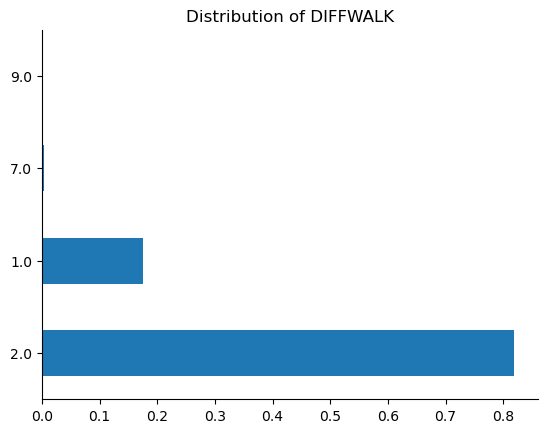

In [57]:
clean_data["DIFFWALK"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of DIFFWALK")
sns.despine()
plt.show()

Since there are samll portion null values ,We can use the 7: unkown category to fill in the missing values(1: Yes, 2:No, 7: Don’t know/Not sure,9: Refused).

In [58]:
clean_data["DIFFWALK"] = clean_data["DIFFWALK"].fillna(7)

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\167706086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["DIFFWALK"] = clean_data["DIFFWALK"].fillna(7)


In [59]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4        3
_AGEG5YR        0
SEXVAR          0
EDUCA           5
INCOME3      7027
_RFHYPE6        0
_CHOLCH3        0
TOLDHI3         0
_BMI5CAT        0
_SMOKER3        0
CVDSTRK3        2
_MICHD       4618
CVDCRHD4        2
_TOTINDA        0
_FRTLT1A        0
_VEGLT1A        0
_RFDRHV7        0
_HLTHPLN        0
MEDCOST1        5
GENHLTH         4
MENTHLTH        2
PHYSHLTH        3
DIFFWALK        0
BLIND       13624
dtype: int64

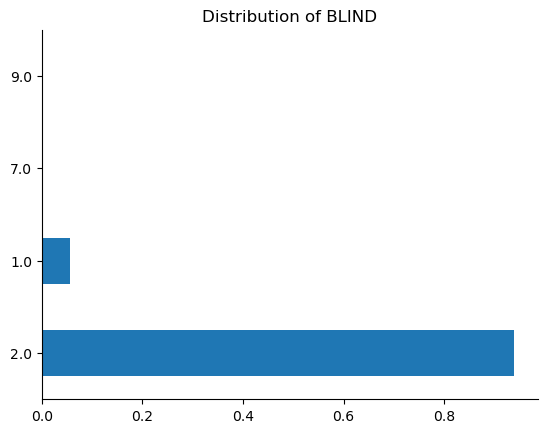

In [60]:
clean_data["BLIND"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of BLIND")
sns.despine()
plt.show()

Since there are samll portion null values ,We can use the 2: No to fill in the missing values(1: Yes, 2:No).

In [61]:
clean_data["BLIND"] = clean_data["BLIND"].fillna(2)

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\2833965397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["BLIND"] = clean_data["BLIND"].fillna(2)


In [62]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4       3
_AGEG5YR       0
SEXVAR         0
EDUCA          5
INCOME3     7027
_RFHYPE6       0
_CHOLCH3       0
TOLDHI3        0
_BMI5CAT       0
_SMOKER3       0
CVDSTRK3       2
_MICHD      4618
CVDCRHD4       2
_TOTINDA       0
_FRTLT1A       0
_VEGLT1A       0
_RFDRHV7       0
_HLTHPLN       0
MEDCOST1       5
GENHLTH        4
MENTHLTH       2
PHYSHLTH       3
DIFFWALK       0
BLIND          0
dtype: int64

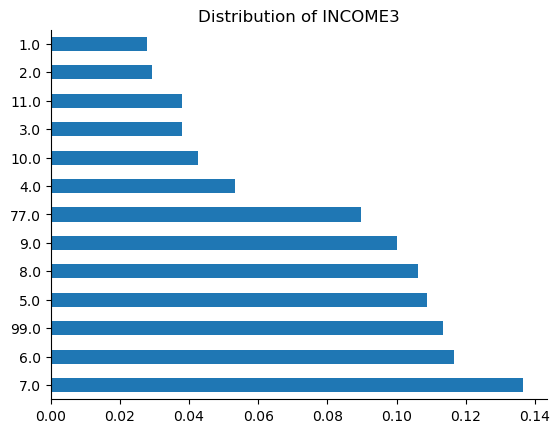

In [63]:
clean_data["INCOME3"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of INCOME3")
sns.despine()
plt.show()

Since there are samll portion null values ,We can use the 77:`Don’t know/Not sure`  to fill in the missing values(1: Yes, 2:No).( 1: <$10 K, 2: $10–$15 K, 3: $15–$20 K, 4: $20–$25 K, 5: $25–$35 K, 6: $35–$50 K, 7: $50–$75 K, 8: $75 k-100 K,9:$100 K-$150 K,10:$150 k-$200 K,11:>$200 K, 77:Don’t know/Not sure,99:Refuse) 

In [64]:
clean_data["INCOME3"] = clean_data["INCOME3"].fillna(77)

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\1716947790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["INCOME3"] = clean_data["INCOME3"].fillna(77)


In [65]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4       3
_AGEG5YR       0
SEXVAR         0
EDUCA          5
INCOME3        0
_RFHYPE6       0
_CHOLCH3       0
TOLDHI3        0
_BMI5CAT       0
_SMOKER3       0
CVDSTRK3       2
_MICHD      4618
CVDCRHD4       2
_TOTINDA       0
_FRTLT1A       0
_VEGLT1A       0
_RFDRHV7       0
_HLTHPLN       0
MEDCOST1       5
GENHLTH        4
MENTHLTH       2
PHYSHLTH       3
DIFFWALK       0
BLIND          0
dtype: int64

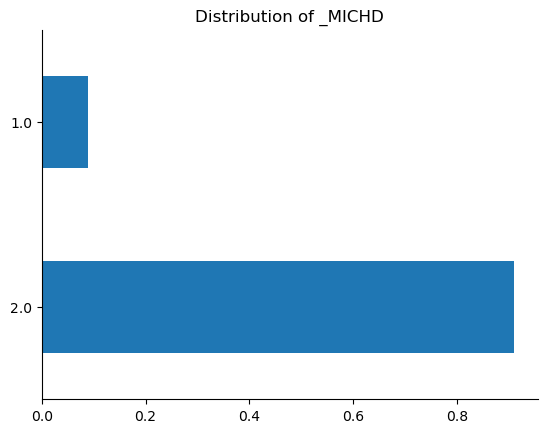

In [66]:
clean_data["_MICHD"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of _MICHD")
sns.despine()
plt.show()

Since there are samll portion null values ,We can use the 1: No to fill in the missing values(1: Yes, 2:No).

In [68]:
clean_data["_MICHD"] = clean_data["_MICHD"].fillna(1)

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\2379775788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["_MICHD"] = clean_data["_MICHD"].fillna(1)


In [69]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4    3
_AGEG5YR    0
SEXVAR      0
EDUCA       5
INCOME3     0
_RFHYPE6    0
_CHOLCH3    0
TOLDHI3     0
_BMI5CAT    0
_SMOKER3    0
CVDSTRK3    2
_MICHD      0
CVDCRHD4    2
_TOTINDA    0
_FRTLT1A    0
_VEGLT1A    0
_RFDRHV7    0
_HLTHPLN    0
MEDCOST1    5
GENHLTH     4
MENTHLTH    2
PHYSHLTH    3
DIFFWALK    0
BLIND       0
dtype: int64

Now we only have very very small number of null values, so we can drop these null values.

In [70]:
clean_data = clean_data.dropna()
clean_data.shape

(398238, 24)

Finally, our data set is all clean:

In [71]:
# axis=0 means summing the rows
clean_data.isna().sum(axis=0)

DIABETE4    0
_AGEG5YR    0
SEXVAR      0
EDUCA       0
INCOME3     0
_RFHYPE6    0
_CHOLCH3    0
TOLDHI3     0
_BMI5CAT    0
_SMOKER3    0
CVDSTRK3    0
_MICHD      0
CVDCRHD4    0
_TOTINDA    0
_FRTLT1A    0
_VEGLT1A    0
_RFDRHV7    0
_HLTHPLN    0
MEDCOST1    0
GENHLTH     0
MENTHLTH    0
PHYSHLTH    0
DIFFWALK    0
BLIND       0
dtype: int64

Modify and clean the values to be more suitable to ML algorithms.

In order to do this part, I referenced the codebook which says what each column/feature/question is: https://www.cdc.gov/brfss/annual_data/2021/pdf/codebook21_llcp-v2-508.pdf

In [74]:
# DIABETE4
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
clean_data['DIABETE4'] = clean_data['DIABETE4'].replace({2:0, 3:0, 1:2, 4:1})
clean_data = clean_data[clean_data.DIABETE4 != 7]
clean_data = clean_data[clean_data.DIABETE4 != 9]
clean_data.DIABETE4.unique()

array([0., 2., 1.])

In [76]:
#1 _RFHYPE6
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
clean_data['_RFHYPE6'] = clean_data['_RFHYPE6'].replace({1:0, 2:1})
clean_data = clean_data[clean_data._RFHYPE6 != 9]
clean_data._RFHYPE6.unique()

array([0., 1.])

In [77]:
#2 TOLDHI3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
clean_data['TOLDHI3'] = clean_data['TOLDHI3'].replace({2:0})
clean_data = clean_data[clean_data.TOLDHI3 != 7]
clean_data = clean_data[clean_data.TOLDHI3 != 9]
clean_data.TOLDHI3.unique()

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\3779952879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['TOLDHI3'] = clean_data['TOLDHI3'].replace({2:0})


array([1., 0.])

In [78]:
#3 _CHOLCH3
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
clean_data['_CHOLCH3'] = clean_data['_CHOLCH3'].replace({3:0,2:0})
clean_data = clean_data[clean_data._CHOLCH3 != 9]
clean_data._CHOLCH3.unique()

array([1., 0.])

In [82]:
#4 _SMOKER3
# Change 2,3 to 1 because it is Yes
# Change 4 to 0 because it is No
# Remove all 9 (refused)
clean_data['_SMOKER3'] = clean_data['_SMOKER3'].replace({2:1,3:1,4:0})
clean_data = clean_data[clean_data._SMOKER3 != 9]
clean_data._SMOKER3.unique()

array([1., 0.])

In [83]:
#5 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
clean_data['CVDSTRK3'] = clean_data['CVDSTRK3'].replace({2:0})
clean_data = clean_data[clean_data.CVDSTRK3 != 7]
clean_data = clean_data[clean_data.CVDSTRK3 != 9]
clean_data.CVDSTRK3.unique()

array([0., 1.])

In [84]:
#6 _MICHD
#Change 2 to 0 because this means did not have MI or CHD
clean_data['_MICHD'] = clean_data['_MICHD'].replace({2: 0})
clean_data._MICHD.unique()

array([0., 1.])

In [85]:
#7 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
clean_data['_TOTINDA'] = clean_data['_TOTINDA'].replace({2:0})
clean_data = clean_data[clean_data._TOTINDA != 9]
clean_data._TOTINDA.unique()

array([0., 1.])

In [87]:
#8 _FRTLT1A
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
clean_data['_FRTLT1A'] = clean_data['_FRTLT1A'].replace({2:0})
clean_data = clean_data[clean_data._FRTLT1A != 9]
clean_data._FRTLT1A.unique()

array([1., 0.])

In [88]:
#9 _VEGLT1A
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
clean_data['_VEGLT1A'] = clean_data['_VEGLT1A'].replace({2:0})
clean_data = clean_data[clean_data._VEGLT1A != 9]
clean_data._VEGLT1A.unique()

C:\Users\cathy\AppData\Local\Temp\ipykernel_18324\3344383191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['_VEGLT1A'] = clean_data['_VEGLT1A'].replace({2:0})


array([1., 0.])

In [89]:
#10 _RFDRHV7
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
clean_data['_RFDRHV7'] = clean_data['_RFDRHV7'].replace({1:0, 2:1})
clean_data = clean_data[clean_data._RFDRHV7 != 9]
clean_data._RFDRHV7.unique()

array([0., 1.])

In [91]:
#11 _HLTHPLN
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
clean_data['_HLTHPLN'] = clean_data['_HLTHPLN'].replace({2:0})
clean_data = clean_data[clean_data._HLTHPLN != 7]
clean_data = clean_data[clean_data._HLTHPLN != 9]
clean_data._HLTHPLN.unique()

array([1., 0.])

In [92]:
#12 MEDCOST1
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
clean_data['MEDCOST1'] = clean_data['MEDCOST1'].replace({2:0})
clean_data = clean_data[clean_data.MEDCOST1 != 7]
clean_data = clean_data[clean_data.MEDCOST1 != 9]
clean_data.MEDCOST1.unique()

array([0., 1.])

In [93]:
#13 GENHLTH
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
clean_data = clean_data[clean_data.GENHLTH != 7]
clean_data = clean_data[clean_data.GENHLTH != 9]
clean_data.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

In [94]:
#14 MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
clean_data['MENTHLTH'] = clean_data['MENTHLTH'].replace({88:0})
clean_data = clean_data[clean_data.MENTHLTH != 77]
clean_data = clean_data[clean_data.MENTHLTH != 99]
clean_data.MENTHLTH.unique()

array([10.,  0.,  5., 25.,  2.,  7., 30.,  3., 15., 20., 14.,  8.,  1.,
        4., 28., 24., 21., 12.,  6., 22., 27., 18., 13., 17., 16.,  9.,
       19., 29., 23., 11., 26.])

In [95]:
#15 PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
clean_data['PHYSHLTH'] = clean_data['PHYSHLTH'].replace({88:0})
clean_data = clean_data[clean_data.PHYSHLTH != 77]
clean_data = clean_data[clean_data.PHYSHLTH != 99]
clean_data.PHYSHLTH.unique()

array([20.,  0., 30., 25.,  1.,  4., 10.,  2.,  3., 15.,  8., 13., 14.,
        5.,  7.,  6., 24., 29., 18., 12.,  9., 16., 17., 26., 28., 21.,
       27., 11., 19., 22., 23.])

In [96]:
#16 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
clean_data['DIFFWALK'] = clean_data['DIFFWALK'].replace({2:0})
clean_data = clean_data[clean_data.DIFFWALK != 7]
clean_data = clean_data[clean_data.DIFFWALK != 9]
clean_data.DIFFWALK.unique()

array([0., 1.])

In [97]:
#17 SEXVAR
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
clean_data['SEXVAR'] = clean_data['SEXVAR'].replace({2:0})
clean_data.SEXVAR.unique()

array([0., 1.])

In [99]:
#18 _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
clean_data = clean_data[clean_data._AGEG5YR != 14]
clean_data._AGEG5YR.unique()

array([11., 10.,  9., 12., 13.,  7.,  6.,  8.,  4.,  3.,  5.,  2.,  1.])

In [100]:
#19 EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
clean_data = clean_data[clean_data.EDUCA != 9]
clean_data.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [101]:
#20 INCOME3
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
clean_data = clean_data[clean_data.INCOME3 != 77]
clean_data = clean_data[clean_data.INCOME3 != 99]
clean_data.INCOME3.unique()

array([ 5.,  3.,  7.,  4.,  6.,  8.,  2.,  9., 10.,  1., 11.])

In [104]:
#21 CVDCRHD4
#Change 2 to 0 because this means No
clean_data['CVDCRHD4'] = clean_data['CVDCRHD4'].replace({2: 0})
clean_data = clean_data[clean_data.CVDCRHD4 != 7]
clean_data = clean_data[clean_data.CVDCRHD4 != 9]
clean_data.CVDCRHD4.unique()

array([0., 1.])

In [106]:
#22 BLIND
#Change 2 to 0 because this means No
clean_data['BLIND'] = clean_data['BLIND'].replace({2: 0})
clean_data = clean_data[clean_data.BLIND != 7]
clean_data = clean_data[clean_data.BLIND != 9]
clean_data.BLIND.unique()

array([0., 1.])

In [108]:
#Check the shape of the dataset now: We have 215,258 cleaned rows and 24 columns (1 of which is our dependent variable)
clean_data.shape

(215258, 24)

In [109]:
#Check Class Sizes of the heart disease column
clean_data.groupby(['DIABETE4']).size()

DIABETE4
0.0    175326
1.0      5826
2.0     34106
dtype: int64

## 3. Make feature names more readable

In [113]:
#Rename the columns to make them more readable
clean_data = clean_data.rename(columns = {'DIABETE4':'Diabetes_012', 
                                         '_RFHYPE6':'HighBP',  
                                         'TOLDHI3':'HighChol', '_CHOLCH3':'CholCheck', 
                                         '_BMI5CAT':'BMI', 
                                         '_SMOKER3':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1A':'Fruits', '_VEGLT1A':"Veggies", 
                                         '_RFDRHV7':'HvyAlcoholConsump', 
                                         '_HLTHPLN':'AnyHealthcare', 'MEDCOST1':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEXVAR':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME3':'Income',
                                         'CVDCRHD4':'HeartDisease','BLIND':'Blind' })

In [115]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215258 entries, 0 to 438692
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          215258 non-null  float64
 1   Age                   215258 non-null  float64
 2   Sex                   215258 non-null  float64
 3   Education             215258 non-null  float64
 4   Income                215258 non-null  float64
 5   HighBP                215258 non-null  float64
 6   CholCheck             215258 non-null  float64
 7   HighChol              215258 non-null  float64
 8   BMI                   215258 non-null  float64
 9   Smoker                215258 non-null  float64
 10  Stroke                215258 non-null  float64
 11  HeartDiseaseorAttack  215258 non-null  float64
 12  HeartDisease          215258 non-null  float64
 13  PhysActivity          215258 non-null  float64
 14  Fruits                215258 non-null  float64
 15  

In [116]:
clean_data = clean_data.astype(int)

In [117]:
clean_data.head()

,Diabetes_012,Age,Sex,Education,Income,HighBP,CholCheck,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,HeartDisease,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Blind
0,0,11,0,4,5,0,1,1,1,1,0,0,0,0,1,1,0,1,0,5,10,20,0,0
2,2,11,0,4,3,1,1,0,3,0,0,1,1,0,1,0,0,1,0,2,0,0,0,0
3,2,9,0,4,7,1,1,1,4,0,0,0,0,1,1,1,0,1,0,2,10,0,0,0
5,0,13,1,5,6,0,1,0,2,1,0,0,0,0,0,0,0,1,0,3,0,0,1,0
9,0,10,0,4,8,1,1,0,4,1,0,0,0,1,1,1,0,1,0,3,5,25,1,0


## 4. Save clean data to csv

In [119]:

clean_data.to_csv('diabetes_health_indicators_BRFSS2021.csv', sep=",", index=False)
